In [71]:
# Useful starting lines
%matplotlib inline
import numpy as np
%load_ext autoreload
%autoreload 2

#plot library
import seaborn as sns
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
from helpers import *
from cross_val import *
from preprocessing import *
from plot import *

# Data Exploration

In [73]:
DEBUG = False 

In [74]:
PATH_TRAIN= '../data/train.csv'
PATH_TEST = '../data/test.csv'
y, tX, ids = load_csv_data(PATH_TRAIN, sub_sample=DEBUG)
y_test, tX_test, ids_test = load_csv_data(PATH_TEST, sub_sample=DEBUG)
features_name = np.genfromtxt('../data/train.csv', delimiter=",", dtype=str,max_rows=1)[2:]

In [75]:
print("y train size : ", y.shape[0] )
print("train tX shape : ", tX.shape[0])
print( "y test size : ", y_test.shape[0])
print("test tX shape : ", tX_test.shape)

y train size :  250000
train tX shape :  250000
y test size :  568238
test tX shape :  (568238, 30)


In [76]:
print("# Higgs signal particules (s): ", len(y[y==1]), '/',round(len(y[y==1])*100/len(y),0),'%')
print("# background particules (b): ", len(y[y==-1]), '/',round(len(y[y==-1])*100/len(y),0),'%')

# Higgs signal particules (s):  85667 / 34.0 %
# background particules (b):  164333 / 66.0 %


In [77]:
print("There are" , len(tX[tX==-999.0]),'(',
      np.round(len(tX[tX==-999.0])*100./(len(tX)*30)),  "%), missing values")

There are 1580052 ( 21.0 %), missing values


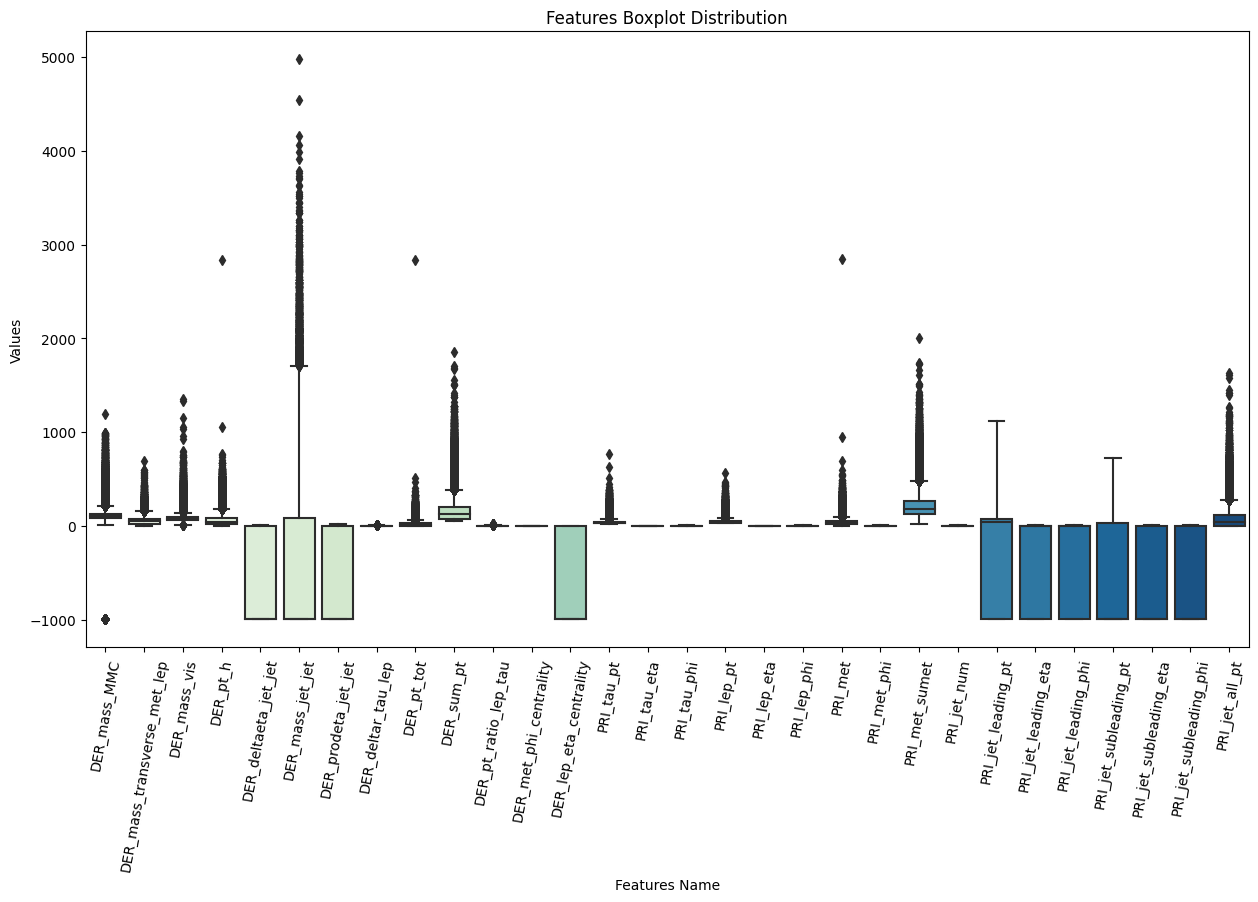

In [78]:
palette = sns.color_palette("GnBu", n_colors=30)


figure = plt.figure(figsize=(15,8))
ax = sns.boxplot(data = tX, palette = palette)
ax.set_xticklabels(features_name, rotation = 80)
plt.title("Features Boxplot Distribution")
plt.xlabel('Features Name')
plt.ylabel('Values')
plt.show()

*need to standarize the features + remove outliers*

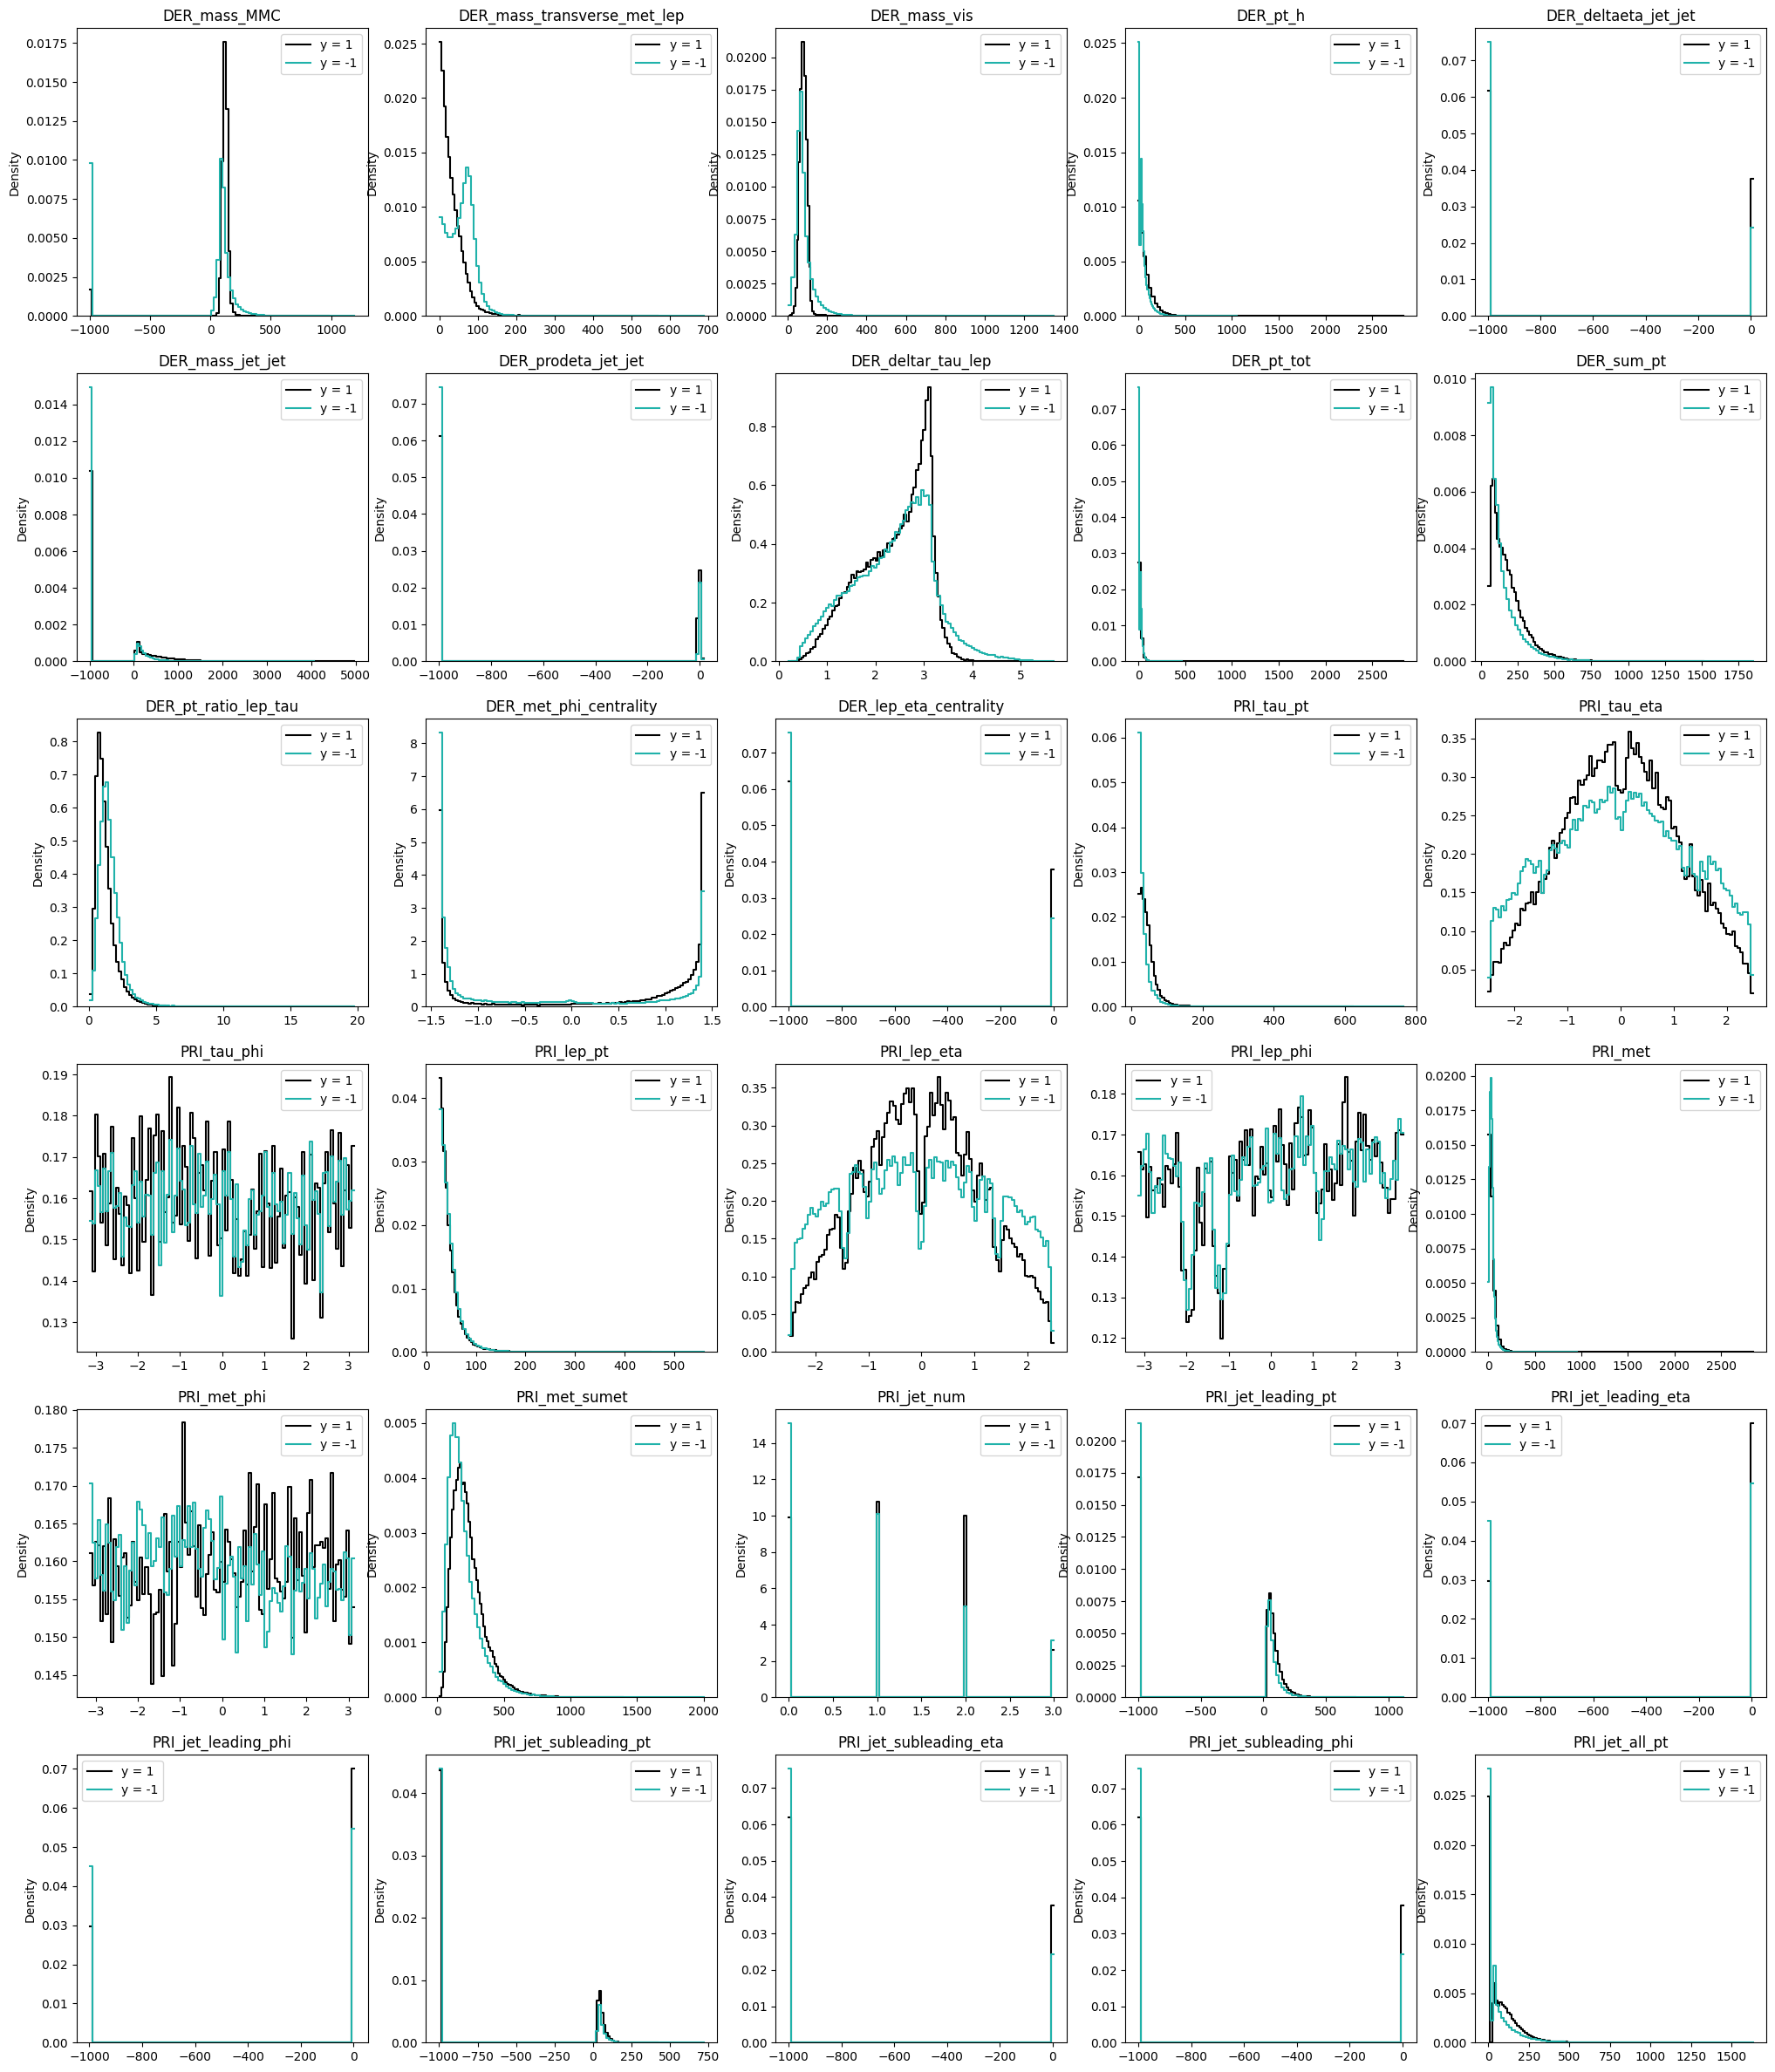

In [79]:
fig= plt.figure(figsize=(25,30))

for idx in range(tX.shape[1]): 
    ax=plt.subplot(6,5,idx+1)
    
    #density plot of each feature depending on the y response
    sns.histplot(data=tX[y==1, idx], ax=ax, element="step", 
                 fill=False, color = 'black', stat = 'density', bins = 100)
    sns.histplot(data=tX[y==-1, idx], ax=ax, element="step",
                 fill=False, color = 'lightseagreen', stat = 'density', bins = 100)
    
    #plot parameters
    ax.set_title(features_name[idx])
    ax.legend(["y = 1", "y = -1"])

*NB : test without PRI_tau_phi, PRI_met_phi, PRI_lep_phi*

# Data Preprocessing

In [80]:
preprocessed_X, preprocessed_y = preprocess_data(tX, y, False)
preprocessed_X_test, y_test = preprocess_data(tX_test, y_test, True)

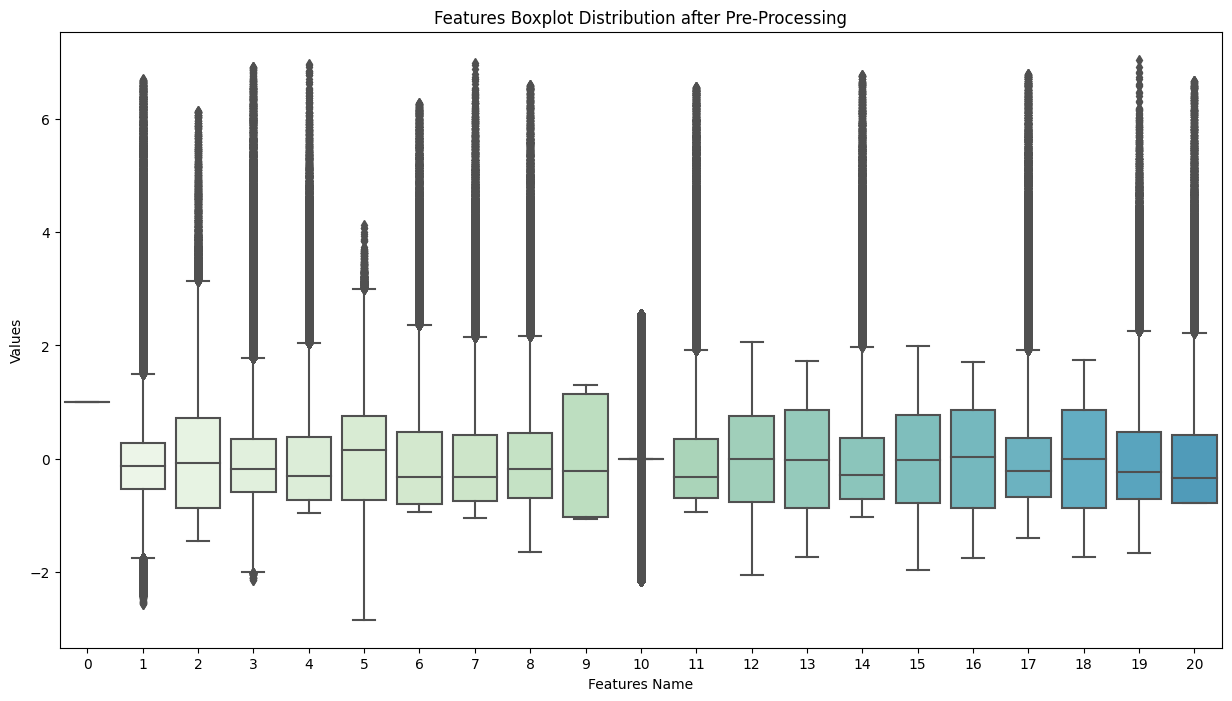

In [81]:
palette = sns.color_palette("GnBu", n_colors=30)
figure = plt.figure(figsize=(15,8))
ax = sns.boxplot(data = preprocessed_X, palette = palette)
#ax.set_xticklabels(features_name, rotation = 80)
plt.title("Features Boxplot Distribution after Pre-Processing")
plt.xlabel('Features Name')
plt.ylabel('Values')
plt.show()

# Method implementation

In [82]:
seed = 2
k_fold = 5

## Least square with GD

### Parameters in order to tune
- gamma (learning rate)
- D (degree of polynomial thingy)

*parameters : learning rate, number of iteration, fold, degree
--> tune learning rate & degree ?*

Tested parameters
 [{'gamma': 0.1, 'degree': 1, 'max_iters': 50}, {'gamma': 0.1, 'degree': 2, 'max_iters': 50}, {'gamma': 0.1, 'degree': 3, 'max_iters': 50}, {'gamma': 0.1, 'degree': 4, 'max_iters': 50}, {'gamma': 0.1, 'degree': 5, 'max_iters': 50}, {'gamma': 0.1, 'degree': 6, 'max_iters': 50}, {'gamma': 0.1, 'degree': 7, 'max_iters': 50}, {'gamma': 0.1, 'degree': 8, 'max_iters': 50}, {'gamma': 0.1, 'degree': 9, 'max_iters': 50}]


/Users/skowronski/Documents/courses/ML_22/project_1/ML/project/implementations.py:28: RuntimeWarning: overflow encountered in square
  mse = 1/2*np.mean(e**2)
/Users/skowronski/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/skowronski/Documents/courses/ML_22/project_1/ML/project/implementations.py:98: RuntimeWarning: invalid value encountered in subtract
  w = w - gamma * grad
/Users/skowronski/Documents/courses/ML_22/project_1/ML/project/implementations.py:68: RuntimeWarning: invalid value encountered in matmul
  y_pred=(np.matmul(x, w))


Best parameters
 {'gamma': 0.1, 'degree': 1, 'max_iters': 50}


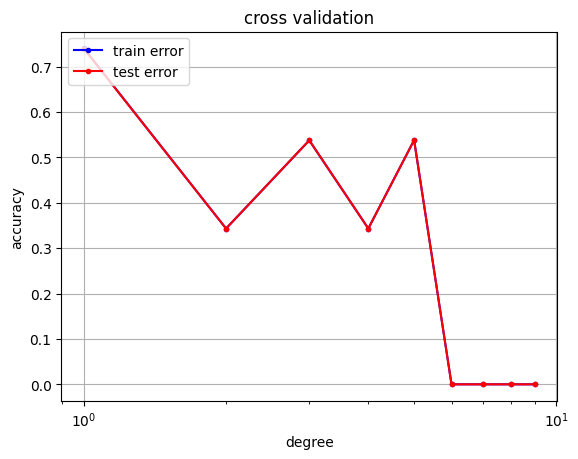

In [83]:
method = least_squares_GD
degree=np.arange(1,10)
gamma = 0.1
max_iters = 50
parameters = []
for d in degree:
    parameters.append({'gamma':gamma, 'degree':d, 'max_iters':max_iters})
print('Tested parameters\n', parameters)
acc_tr_deg, acc_te_deg, idx_best = cross_tunning(preprocessed_y, preprocessed_X,
                                         k_fold=k_fold, method=method , parameters=parameters, seed=seed)


cross_validation_visualization(degree, acc_tr_deg, acc_te_deg, 'degree')
print('Best parameters\n', parameters[idx_best])

Tested parameters
 [{'gamma': 1e-07, 'degree': 1, 'max_iters': 50}, {'gamma': 1e-06, 'degree': 1, 'max_iters': 50}, {'gamma': 1e-05, 'degree': 1, 'max_iters': 50}, {'gamma': 0.0001, 'degree': 1, 'max_iters': 50}, {'gamma': 0.001, 'degree': 1, 'max_iters': 50}, {'gamma': 0.01, 'degree': 1, 'max_iters': 50}, {'gamma': 0.1, 'degree': 1, 'max_iters': 50}, {'gamma': 1.0, 'degree': 1, 'max_iters': 50}]
Best parameters
 {'gamma': 0.1, 'degree': 1, 'max_iters': 50}


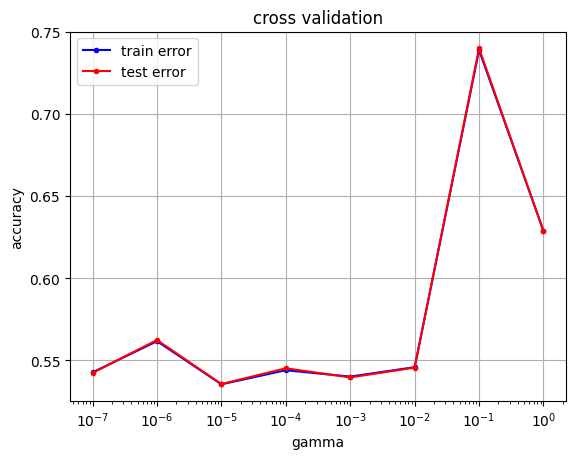

In [84]:
method = least_squares_GD
degree = parameters[idx_best]['degree']
gammas= np.logspace(-7, 0, 8)
max_iters = 50
parameters = []
for g in gammas:
    parameters.append({'gamma':g, 'degree':degree, 'max_iters':max_iters})
print('Tested parameters\n', parameters)
acc_tr_deg, acc_te_deg, idx_best = cross_tunning(preprocessed_y, preprocessed_X,
                                         k_fold=k_fold, method=method , parameters=parameters, seed=seed)


cross_validation_visualization(gammas, acc_tr_deg, acc_te_deg, 'gamma')
print('Best parameters\n', parameters[idx_best])

## Least square with SGD

### Parameters for this method
- degree
- gamma (lr)
- max_iters

Tested parameters
 [{'gamma': 0.1, 'degree': 1, 'max_iters': 50}, {'gamma': 0.1, 'degree': 2, 'max_iters': 50}, {'gamma': 0.1, 'degree': 3, 'max_iters': 50}, {'gamma': 0.1, 'degree': 4, 'max_iters': 50}, {'gamma': 0.1, 'degree': 5, 'max_iters': 50}, {'gamma': 0.1, 'degree': 6, 'max_iters': 50}, {'gamma': 0.1, 'degree': 7, 'max_iters': 50}, {'gamma': 0.1, 'degree': 8, 'max_iters': 50}, {'gamma': 0.1, 'degree': 9, 'max_iters': 50}]
Best parameters
 {'gamma': 0.1, 'degree': 5, 'max_iters': 50}


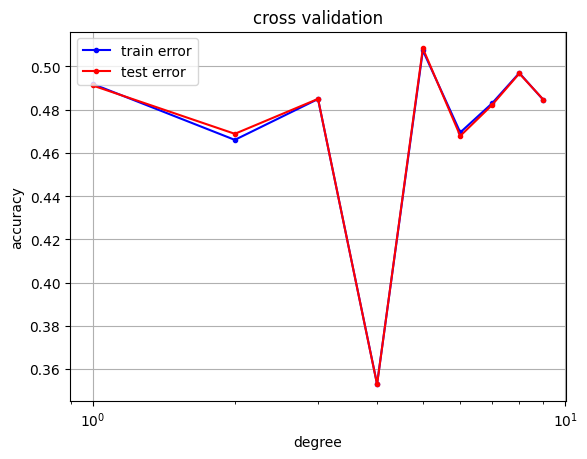

In [85]:
method = least_squares_SGD
degree=np.arange(1,10)
gamma = 0.1
max_iters = 50
parameters = []
for d in degree:
    parameters.append({'gamma':gamma, 'degree':d, 'max_iters':max_iters})
print('Tested parameters\n', parameters)
acc_tr_deg, acc_te_deg, idx_best = cross_tunning(preprocessed_y, preprocessed_X,
                                         k_fold=k_fold, method=method , parameters=parameters, seed=seed)


cross_validation_visualization(degree, acc_tr_deg, acc_te_deg, 'degree')
print('Best parameters\n', parameters[idx_best])

Tested parameters
 [{'gamma': 1e-07, 'degree': 5, 'max_iters': 50}, {'gamma': 1e-06, 'degree': 5, 'max_iters': 50}, {'gamma': 1e-05, 'degree': 5, 'max_iters': 50}, {'gamma': 0.0001, 'degree': 5, 'max_iters': 50}, {'gamma': 0.001, 'degree': 5, 'max_iters': 50}, {'gamma': 0.01, 'degree': 5, 'max_iters': 50}, {'gamma': 0.1, 'degree': 5, 'max_iters': 50}, {'gamma': 1.0, 'degree': 5, 'max_iters': 50}]
Best parameters
 {'gamma': 0.01, 'degree': 5, 'max_iters': 50}


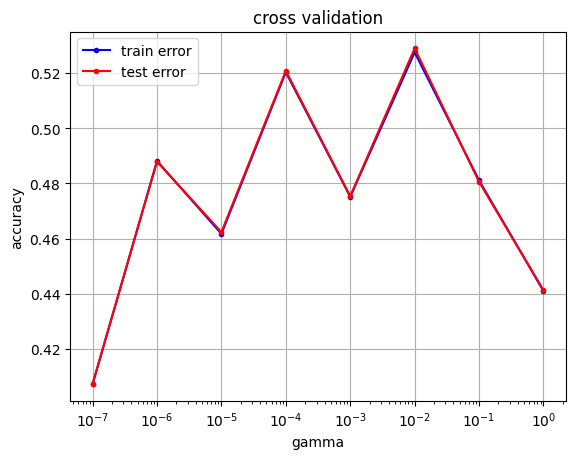

In [86]:
method = least_squares_SGD
degree = parameters[idx_best]['degree']
gammas= np.logspace(-7, 0, 8)
max_iters = 50
parameters = []
for g in gammas:
    parameters.append({'gamma':g, 'degree':degree, 'max_iters':max_iters})
print('Tested parameters\n', parameters)
acc_tr_deg, acc_te_deg, idx_best = cross_tunning(preprocessed_y, preprocessed_X,
                                         k_fold=k_fold, method=method , parameters=parameters, seed=seed)


cross_validation_visualization(gammas, acc_tr_deg, acc_te_deg, 'gamma')
print('Best parameters\n', parameters[idx_best])

## Least square 

### Parameters to tune for this method
- degree
  

Not done yet. Singular matrix error. Flemme.

In [88]:
method = least_squares
degree = np.arange(1,10)
max_iters = 50
parameters = []
for d in degree:
    parameters.append({'degree':d})
print('Tested parameters\n', parameters)
acc_tr_deg, acc_te_deg, idx_best = cross_tunning(preprocessed_y, preprocessed_X,
                                         k_fold=k_fold, method=method , parameters=parameters, seed=seed)


cross_validation_visualization(gammas, acc_tr_deg, acc_te_deg, 'gamma')
print('Best parameters\n', parameters[idx_best])

Tested parameters
 [{'degree': 1}, {'degree': 2}, {'degree': 3}, {'degree': 4}, {'degree': 5}, {'degree': 6}, {'degree': 7}, {'degree': 8}, {'degree': 9}]


LinAlgError: Singular matrix

## Ride Regression 

### Parameters for this method
- degree
- lambda_

Tested parameters
 [{'lambda_': 0.1, 'degree': 1}, {'lambda_': 0.1, 'degree': 2}, {'lambda_': 0.1, 'degree': 3}, {'lambda_': 0.1, 'degree': 4}, {'lambda_': 0.1, 'degree': 5}, {'lambda_': 0.1, 'degree': 6}, {'lambda_': 0.1, 'degree': 7}, {'lambda_': 0.1, 'degree': 8}, {'lambda_': 0.1, 'degree': 9}]
Best parameters
 {'lambda_': 0.1, 'degree': 9}


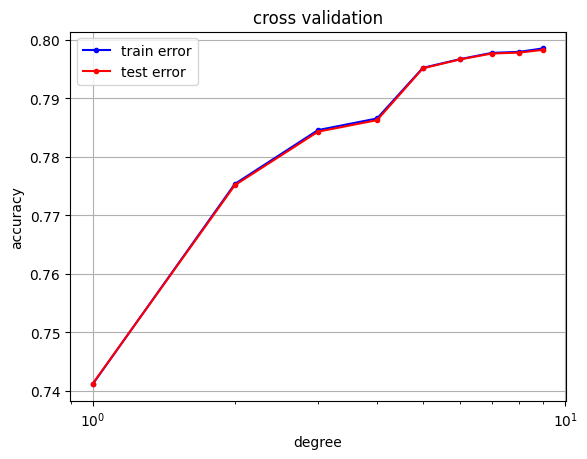

In [89]:
method = ridge_regression
degree=np.arange(1,10)
lambda_ = 0.1
parameters = []
for d in degree:
    parameters.append({'lambda_':lambda_, 'degree':d})
print('Tested parameters\n', parameters)
acc_tr_deg, acc_te_deg, idx_best = cross_tunning(preprocessed_y, preprocessed_X,
                                         k_fold=k_fold, method=method , parameters=parameters, seed=seed)


cross_validation_visualization(degree, acc_tr_deg, acc_te_deg, 'degree')
print('Best parameters\n', parameters[idx_best])

Tested parameters
 [{'lambda_': 1e-07, 'degree': 9}, {'lambda_': 1e-06, 'degree': 9}, {'lambda_': 1e-05, 'degree': 9}, {'lambda_': 0.0001, 'degree': 9}, {'lambda_': 0.001, 'degree': 9}, {'lambda_': 0.01, 'degree': 9}, {'lambda_': 0.1, 'degree': 9}, {'lambda_': 1.0, 'degree': 9}]
Best parameters
 {'lambda_': 1e-05, 'degree': 9}


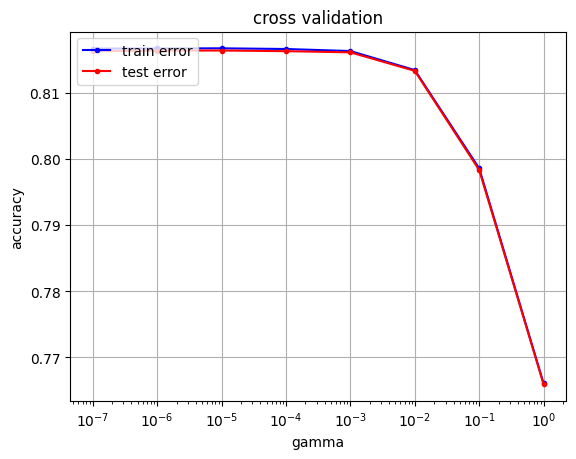

In [90]:
method = ridge_regression
degree = parameters[idx_best]['degree']
lambdas_ = np.logspace(-7, 0, 8)
parameters = []
for l in lambdas_:
    parameters.append({'lambda_':l, 'degree':degree})
print('Tested parameters\n', parameters)
acc_tr_deg, acc_te_deg, idx_best = cross_tunning(preprocessed_y, preprocessed_X,
                                         k_fold=k_fold, method=method , parameters=parameters, seed=seed)


cross_validation_visualization(gammas, acc_tr_deg, acc_te_deg, 'gamma')
print('Best parameters\n', parameters[idx_best])

## Logistic

### Parameters for this method
- initinal_w (set to 0 for simplicity)
- max_iters
- gamma
- degree

Tested parameters
 [{'gamma': 0.01, 'degree': 1, 'max_iters': 50, 'initial_w': None}, {'gamma': 0.01, 'degree': 2, 'max_iters': 50, 'initial_w': None}, {'gamma': 0.01, 'degree': 3, 'max_iters': 50, 'initial_w': None}, {'gamma': 0.01, 'degree': 4, 'max_iters': 50, 'initial_w': None}, {'gamma': 0.01, 'degree': 5, 'max_iters': 50, 'initial_w': None}, {'gamma': 0.01, 'degree': 6, 'max_iters': 50, 'initial_w': None}, {'gamma': 0.01, 'degree': 7, 'max_iters': 50, 'initial_w': None}, {'gamma': 0.01, 'degree': 8, 'max_iters': 50, 'initial_w': None}, {'gamma': 0.01, 'degree': 9, 'max_iters': 50, 'initial_w': None}]


/Users/skowronski/Documents/courses/ML_22/project_1/ML/project/implementations.py:20: RuntimeWarning: overflow encountered in exp
  return np.exp(x)/(1+np.exp(x))
/Users/skowronski/Documents/courses/ML_22/project_1/ML/project/implementations.py:20: RuntimeWarning: invalid value encountered in divide
  return np.exp(x)/(1+np.exp(x))


Best parameters
 {'gamma': 0.01, 'degree': 1, 'max_iters': 50, 'initial_w': None}


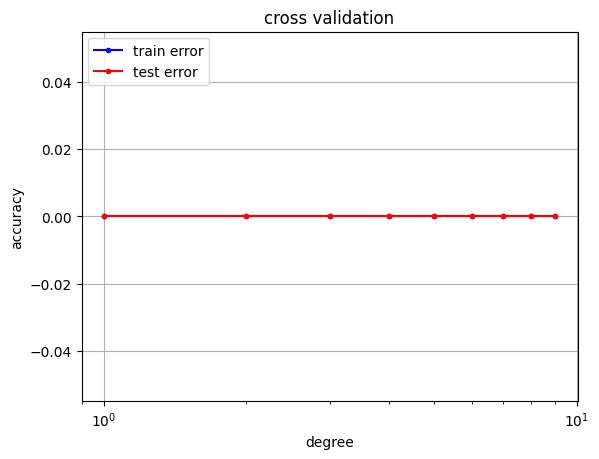

In [91]:
method = logistic_regression
degree = np.arange(1,10)
gamma = 0.01 # note lower gamma here. Otherwise no convergence.
max_iters = 50
parameters = []
for d in degree:
    parameters.append({'gamma':gamma, 'degree':d, 'max_iters':max_iters, 'initial_w':None})
print('Tested parameters\n', parameters)
acc_tr_deg, acc_te_deg, idx_best = cross_tunning(preprocessed_y, preprocessed_X,
                                         k_fold=k_fold, method=method , parameters=parameters, seed=seed)


cross_validation_visualization(degree, acc_tr_deg, acc_te_deg, 'degree')
print('Best parameters\n', parameters[idx_best])

Tested parameters
 [{'gamma': 1e-07, 'degree': 1, 'max_iters': 50, 'initial_w': None}, {'gamma': 1e-06, 'degree': 1, 'max_iters': 50, 'initial_w': None}, {'gamma': 1e-05, 'degree': 1, 'max_iters': 50, 'initial_w': None}, {'gamma': 0.0001, 'degree': 1, 'max_iters': 50, 'initial_w': None}, {'gamma': 0.001, 'degree': 1, 'max_iters': 50, 'initial_w': None}, {'gamma': 0.01, 'degree': 1, 'max_iters': 50, 'initial_w': None}, {'gamma': 0.1, 'degree': 1, 'max_iters': 50, 'initial_w': None}, {'gamma': 1.0, 'degree': 1, 'max_iters': 50, 'initial_w': None}]
Best parameters
 {'gamma': 1e-05, 'degree': 1, 'max_iters': 50, 'initial_w': None}


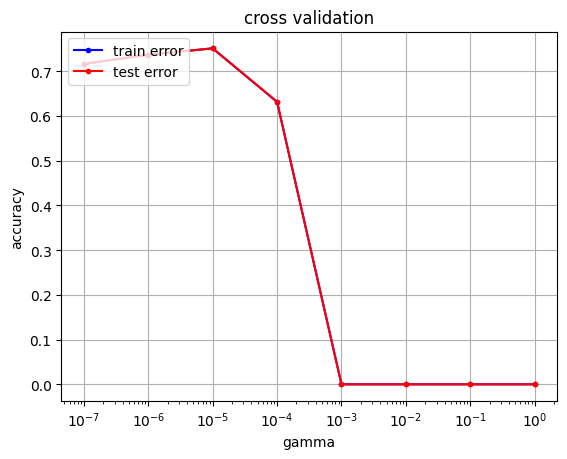

In [92]:
method = logistic_regression
degree = 1
gammas= np.logspace(-7, 0, 8)
max_iters = 50
parameters = []
for g in gammas:
    parameters.append({'gamma':g, 'degree':degree, 'max_iters':max_iters, 'initial_w':None})
print('Tested parameters\n', parameters)
acc_tr_deg, acc_te_deg, idx_best = cross_tunning(preprocessed_y, preprocessed_X,
                                         k_fold=k_fold, method=method , parameters=parameters, seed=seed)


cross_validation_visualization(gammas, acc_tr_deg, acc_te_deg, 'gamma')
print('Best parameters\n', parameters[idx_best])

## Regularized logistic